In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv(r'C:\Users\HP\diabetes.csv')
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())
print(df.nunique())

   slno  gender   age  hypertension  heart_disease smoking_history    bmi  \
0     1  Female  80.0           0.0            1.0           never  25.19   
1     2  Female  54.0           0.0            0.0         No Info  27.32   
2     3    Male  28.0           0.0            0.0           never  27.32   
3     4  Female  36.0           0.0            0.0         current  23.45   
4     5    Male  76.0           1.0            1.0         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  height  weight  
0          6.6                  140         0  171.52   74.11  
1          6.6                   80         0  176.48   83.74  
2          5.7                  158         0  163.29   58.46  
3          5.0                  155         0  187.04   52.77  
4          4.8                  155         0  154.72   68.39  
     slno  gender   age  hypertension  heart_disease smoking_history    bmi  \
695   696  Female  62.0           0.0            0.0            ever  27.2

In [3]:
# Check for missing values in the dataset
# Impute missing values with the mean for numerical columns and mode for categorical columns

print(df.isnull().sum())
print(df.isnull().mean()*100)
for col in df.columns :
    if(df[col].dtype=="object"):
        df[col].fillna(df[col].mode()[0],inplace=True)
    else : 
        df[col].fillna(df[col].median(),inplace=True)
print(df.isnull().sum())

slno                   0
gender                 3
age                    5
hypertension           2
heart_disease          1
smoking_history        5
bmi                    3
HbA1c_level            2
blood_glucose_level    0
diabetes               0
height                 0
weight                 0
dtype: int64
slno                   0.000000
gender                 0.428571
age                    0.714286
hypertension           0.285714
heart_disease          0.142857
smoking_history        0.714286
bmi                    0.428571
HbA1c_level            0.285714
blood_glucose_level    0.000000
diabetes               0.000000
height                 0.000000
weight                 0.000000
dtype: float64
slno                   0
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
height                 0
weight       

<span># Interpretation:
Ensure that no missing values remain after the imputation process.
Helps to confirm that the missing values were handled properly</span>

In [4]:
# Remove the column 'sl.no',weight,height'
df.drop(columns=['slno'], inplace=True)
print("\nColumns after removing 'sl.no':")
print(df.columns)


Columns after removing 'sl.no':
Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'height',
       'weight'],
      dtype='object')


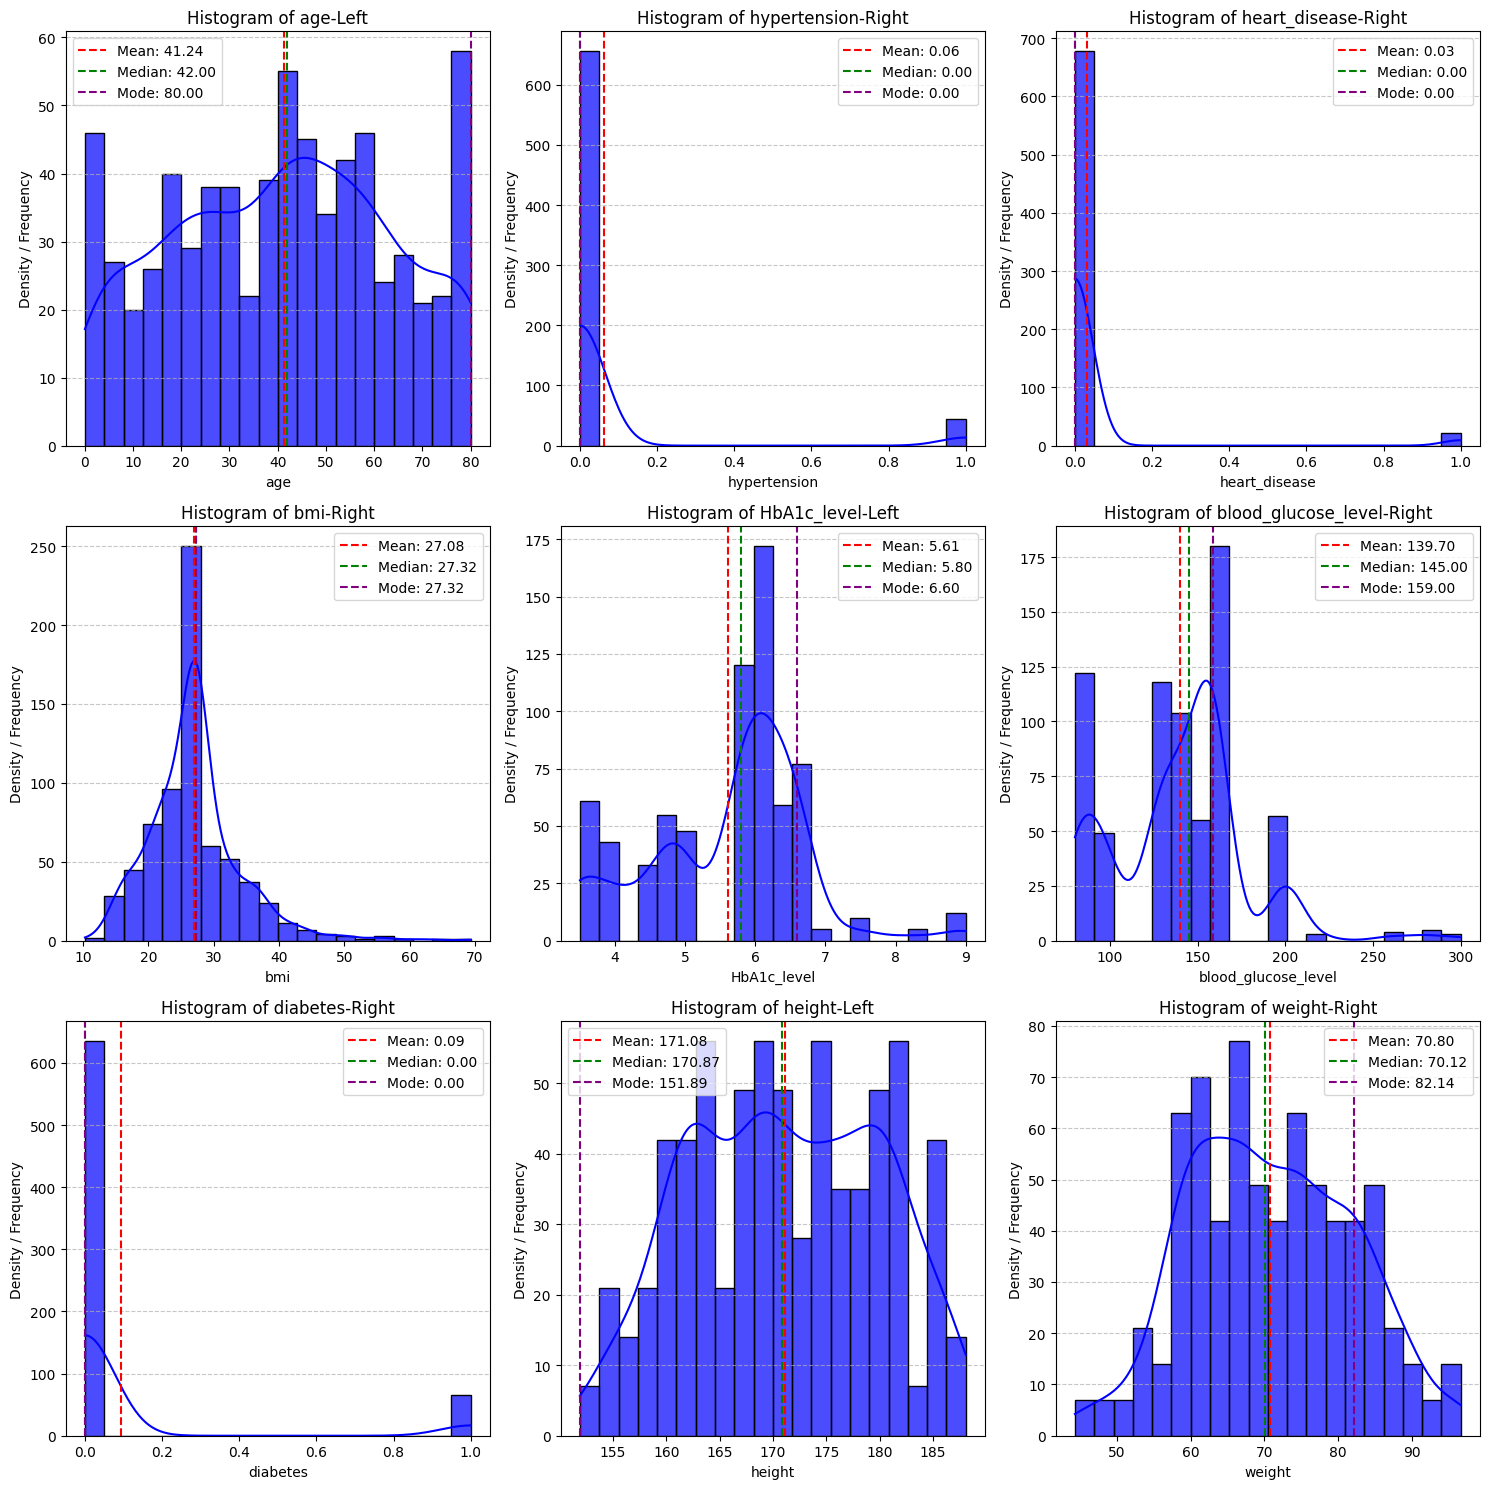

In [5]:
# Univariate Analysis : Plot histograms and check skewness for all numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
rows = (len(numerical_columns) // 3) + (1 if len(numerical_columns) % 3 != 0 else 0)
cols = min(len(numerical_columns), 3)

plt.figure(figsize=(15, rows * 5))
for i, col in enumerate(numerical_columns, 1):
    # Mean, Median, and Skewness Calculation
    mean = df[col].mean()
    median = df[col].median()
    skewness = df[col].skew()

    # Determine skewness type
    if skewness > 0:
        skew='Right'
    elif skewness < 0:
        skew='Left'
    else:
        skew='No skew'

    plt.subplot(rows, cols, i)  
    sns.histplot(df[col], kde=True, bins=20, color='blue', alpha=0.7)
    
    # Add mean, median, and mode lines
    mode_val = df[col].mode()[0]
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='--', label=f'Median: {median:.2f}')
    plt.axvline(mode_val, color='purple', linestyle='--', label=f'Mode: {mode_val:.2f}')
    
    # Titles and labels
    plt.title(f"Histogram of {col}-{skew}")
    plt.xlabel(col)
    plt.ylabel("Density / Frequency")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<span>Most of the factpres are right tailed because mean>median</span>

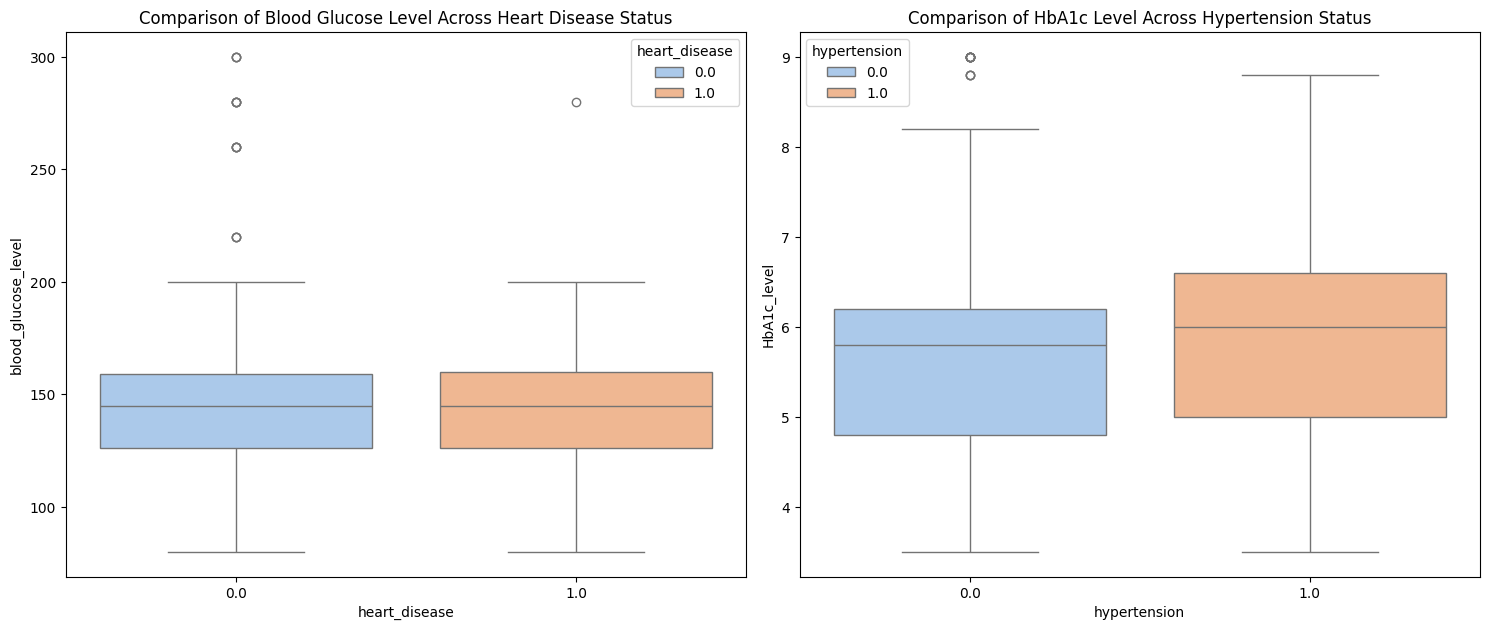

In [6]:
# Set the pastel color palette
sns.set_palette("pastel")

# Create a figure with 2 rows and 2 columns for boxplots
plt.figure(figsize=(15, 12))

# Boxplot 2: Comparison of HbA1c Level across Hypertension status
plt.subplot(2, 2, 2)
sns.boxplot(x='hypertension', y='HbA1c_level', data=df, hue='hypertension')
plt.title('Comparison of HbA1c Level Across Hypertension Status')

# Boxplot 3: Comparison of Blood Glucose Level across Heart Disease status
plt.subplot(2, 2, 1)
sns.boxplot(x='heart_disease', y='blood_glucose_level', data=df, hue='heart_disease')
plt.title('Comparison of Blood Glucose Level Across Heart Disease Status')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

#Interpretation :
    # - Outliers:Dots represent outliers in the boxplot
    # - Median (Central Line): The line inside the box
    # - Interquartile Range (IQR): The distance between the 1st quartile (Q1) and 3rd quartile (Q3), which makes up the box
    # - Whiskers: Lines that extend from the box to the smallest and largest values within 1.5 times the IQR from the lower and upper quartiles.

C:\Users\HP\AppData\Local\Temp\ipykernel_5264\2620620321.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='pastel')
C:\Users\HP\AppData\Local\Temp\ipykernel_5264\2620620321.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='pastel')


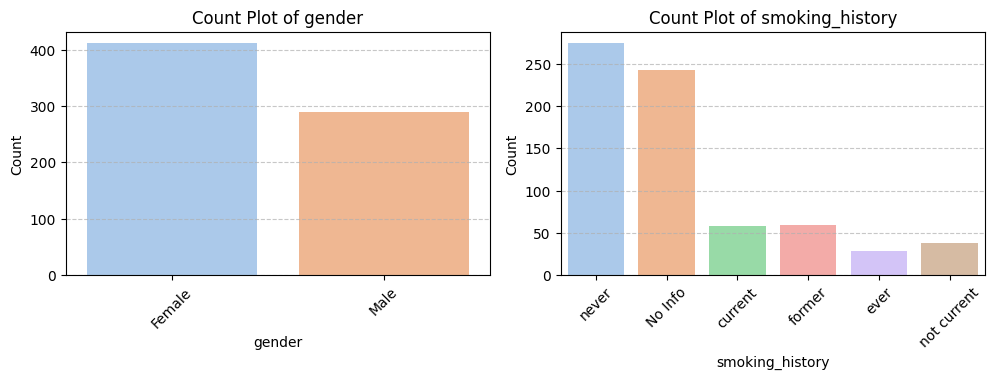

In [7]:
# Univariate Analysis - Count plots for categorical columns

categorical_columns = df.select_dtypes(include=['object']).columns
# Plotting count plots for all categorical columns in one figure
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i) 
    sns.countplot(x=column, data=df, palette='pastel')
    plt.title(f"Count Plot of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
#INterpretation : emake patients are more and mahorit has never smoking peoples

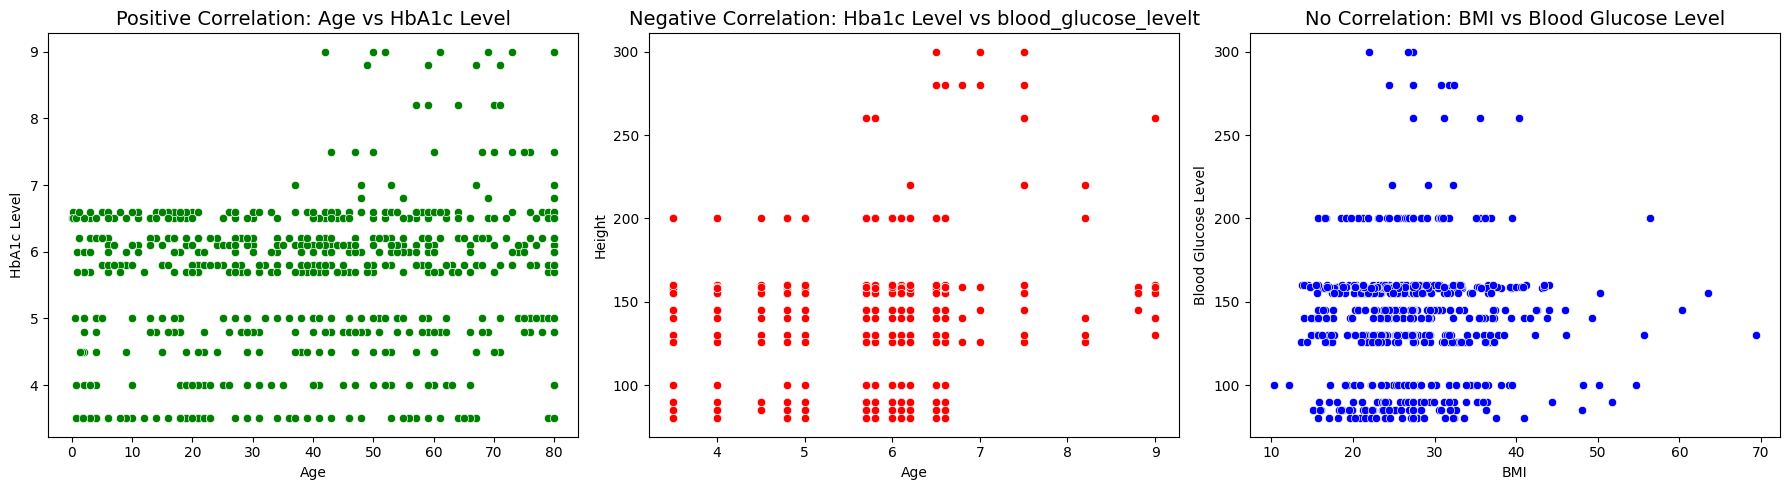

In [8]:
# Positive Correlation (e.g., age vs. HbA1c_level)
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='age', y='HbA1c_level', data=df, color='green')
plt.title('Positive Correlation: Age vs HbA1c Level', fontsize=14)
plt.xlabel('Age')
plt.ylabel('HbA1c Level')

# Negative Correlation (e.g., age vs. height)
plt.subplot(1, 3, 2)
sns.scatterplot(x='HbA1c_level', y='blood_glucose_level', data=df, color='red')
plt.title('Negative Correlation: Hba1c Level vs blood_glucose_levelt', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Height')

# No Correlation (e.g., gender vs. BMI as an example if categorical, but can be extended)
plt.subplot(1, 3, 3)
sns.scatterplot(x='bmi', y='blood_glucose_level', data=df, color='blue')
plt.title('No Correlation: BMI vs Blood Glucose Level', fontsize=14)
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')

plt.tight_layout()
plt.show()
#positive Correlation: As one variable increases, so does the other (Age and HbA1c).
#Negative Correlation: As one variable increases, the other decreases (Hba1c and blood glucose).
#No Correlation: No clear trend or pattern exists between the two variables (BMI and Blood Glucose Level).

C:\Users\HP\AppData\Local\Temp\ipykernel_5264\3481708934.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


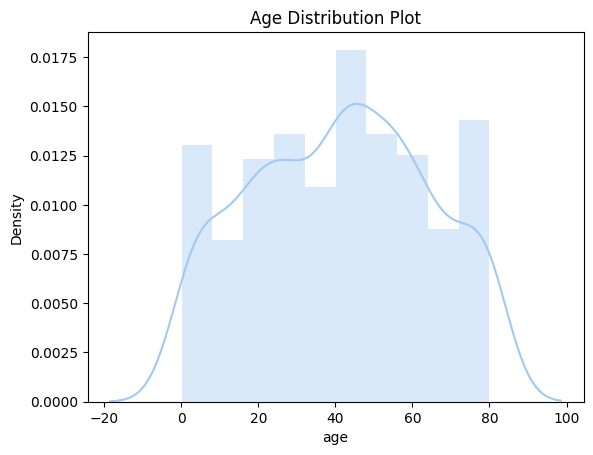

In [9]:
# Data distribution
plt.title('Age Distribution Plot')
sns.distplot(df['age'])
plt.show()

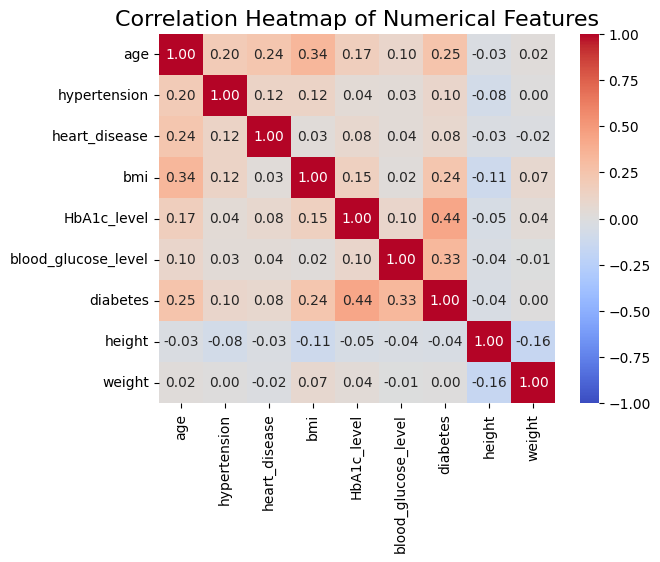

In [10]:
#Multivariate Analysis
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_columns].corr()

# Correlation heatmap for numerical columns in the dataset
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()
#The heatmap will display a grid where each cell represents the correlation between two variables.
    #Positive correlations are highlighted in shades of blue.
    #Negative correlations are in shades of red.
    #A correlation of 0 will be neutral (often white or gray)

In [11]:
from sklearn.preprocessing import LabelEncoder
# Encoding categorical features
df["gender"] = LabelEncoder().fit_transform(df['gender'])
df["smoking_history"] = LabelEncoder().fit_transform(df['smoking_history'])
print(df)

     gender   age  hypertension  heart_disease  smoking_history    bmi  \
0         0  80.0           0.0            1.0                4  25.19   
1         0  54.0           0.0            0.0                0  27.32   
2         1  28.0           0.0            0.0                4  27.32   
3         0  36.0           0.0            0.0                1  23.45   
4         1  76.0           1.0            1.0                1  20.14   
..      ...   ...           ...            ...              ...    ...   
695       0  62.0           0.0            0.0                2  27.27   
696       0  53.0           0.0            0.0                2  42.40   
697       0  55.0           0.0            0.0                4  35.42   
698       0  64.0           0.0            0.0                2  49.27   
699       0  40.0           0.0            0.0                4  31.16   

     HbA1c_level  blood_glucose_level  diabetes  height  weight  
0            6.6                  140        

In [12]:
X=df.drop('diabetes',axis=1).values  #independent variable - features
y=df['diabetes'].values   #dependent variable - target

#Interpretation : 
#test_size=0.4 : 40% testing ,60% training 
#random state : ensures that the data is split in the same way every time you run the code.
#stratify=y  :  both the training and testing sets have a similar proportion of 0's and 1's

In [13]:
print("Dependent Variable (Target): Diabtetes")
print("Independent Variables (Features):")
print(df.columns.drop('diabetes').tolist())

Dependent Variable (Target): Diabtetes
Independent Variables (Features):
['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'height', 'weight']


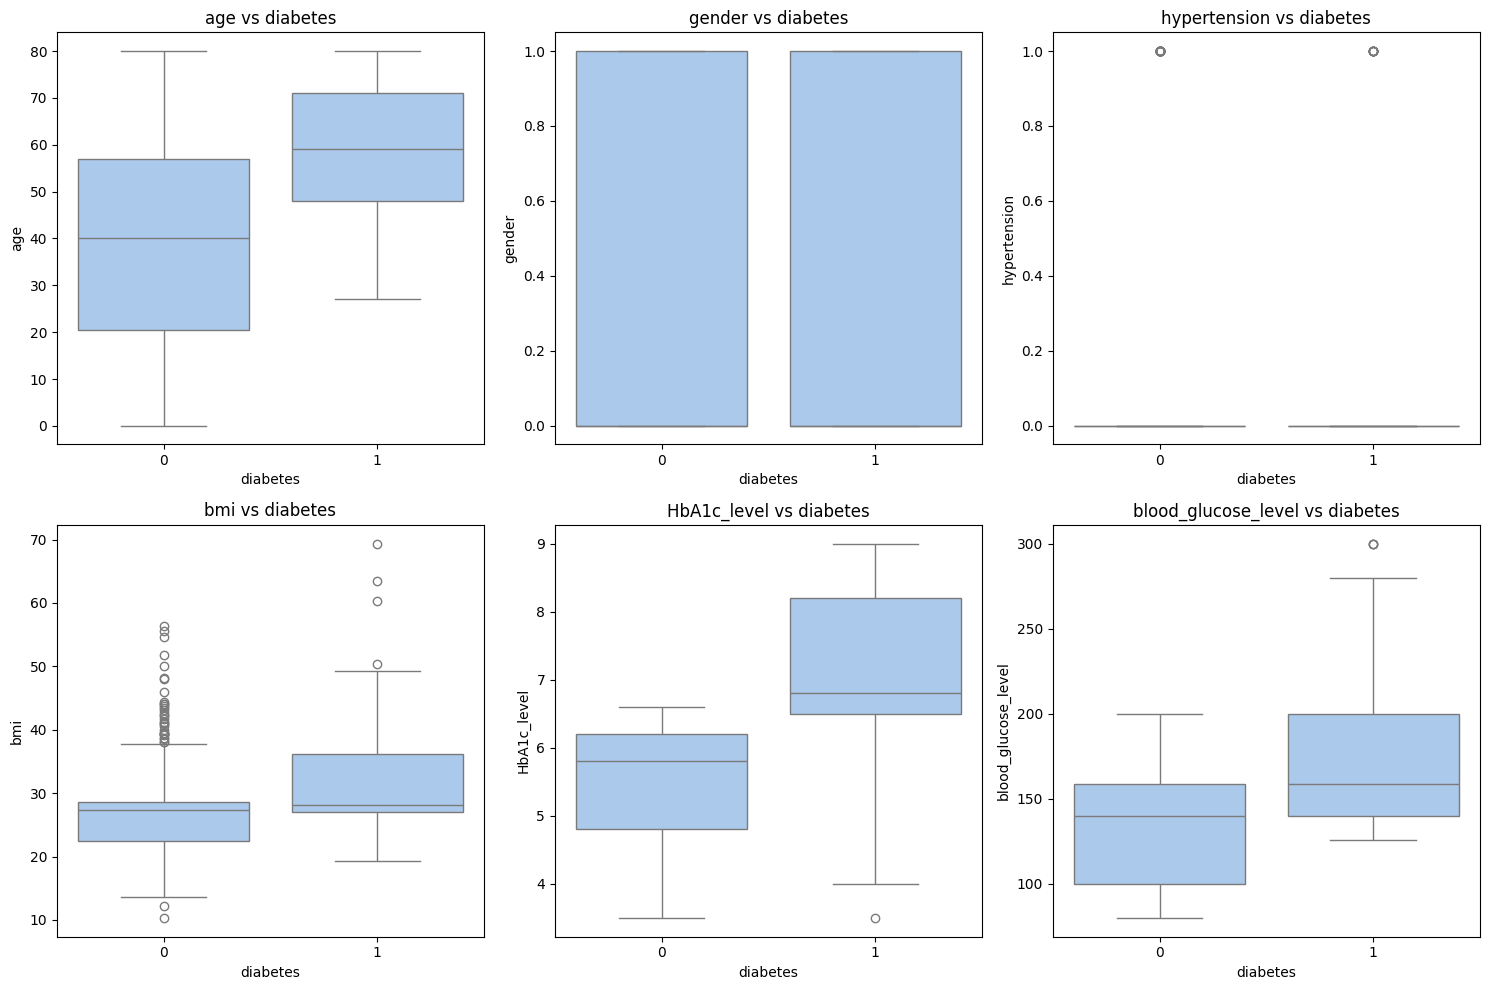

In [24]:
# Step 2 : Visualize the change in the variables
plt.figure(figsize=(15, 10))
numeric_cols = ['age', 'gender', 'hypertension', 
                'bmi', 'HbA1c_level', 'blood_glucose_level']

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='diabetes', y=col, data=df)
    plt.title(f'{col} vs diabetes')
plt.tight_layout()
plt.show()

#Interpretation
#The strongest indicators of diabetes appear to be HbA1c and blood glucose levels
#Age and BMI show moderate associations with diabetes
#Gender and hypertension show less clear associations with diabetes in this dataset
#The data suggests that older age, higher BMI, elevated HbA1c, and higher blood glucose levels are associated with increased likelihood of diabete

In [15]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)  

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

#Interpretation :
#The training set consists of 560 samples, each with 8 features, 
#while the testing set contains 140 samples, also with 8 features. 
#This means that 80% of the data is used for training the model, and the remaining 20% is used for testing the model

Training set shape: (560, 10)
Testing set shape: (140, 10)


In [26]:
# 5. Train the algorithm
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
#Intercept and Slopes
intercept = model.intercept_
print("Intercept:", intercept)

coefficients = model.coef_
print("\nCoefficients:")
feature_names = df.drop('diabetes', axis=1).columns 
for feature, coef in zip(feature_names, model.coef_):
    print(f"{feature}: {coef:.4f}")

Intercept: 0.08928571428571294

Coefficients:
gender: 0.0139
age: 0.0173
hypertension: 0.0067
heart_disease: 0.0083
smoking_history: 0.0257
bmi: 0.0437
HbA1c_level: 0.1037
blood_glucose_level: 0.0771
height: 0.0047
weight: 0.0011


<span>Intercept (0.0893): This is the baseline value when all feature values are zero.
Coefficients: These values show how each feature impacts the target variable (diabetes) being others constant.

#Positive coefficients increase the likelihood of diabetes.
#Higher values (e.g., HbA1c_level, blood_glucose_level) are strong predictors.
#Small values (e.g., weight, height) have minimal influence.</span>

First 5 Predictions:
Predicted Values: [0.08367352 0.16243818 0.01855173 0.05424278 0.3790699 ]
Actual Values: [0 0 0 0 1]


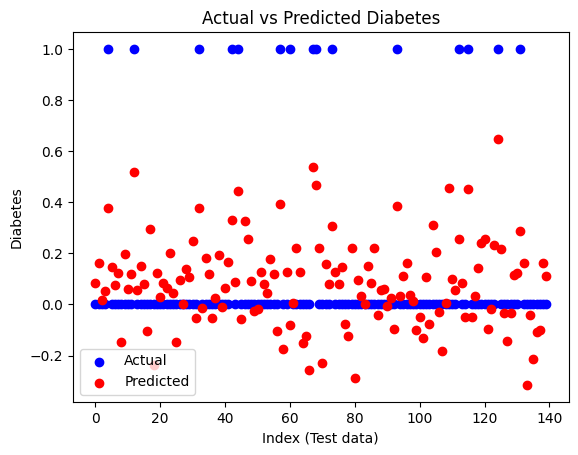

In [18]:
# 7. Make predictions
y_pred = model.predict(X_test)
print("First 5 Predictions:")
print("Predicted Values:", y_pred[:5])
print("Actual Values:", y_test[:5])

# Visualize the results
predicted_values = model.predict(X_test)
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(predicted_values)), predicted_values, color='red', label='Predicted')
plt.title("Actual vs Predicted Diabetes")
plt.xlabel("Index (Test data)")
plt.ylabel("Diabetes")
plt.legend()
plt.show()



<span>For the first 4 samples, the predicted probabilities are relatively low (< 0.2), which aligns with the actual labels (0).
This suggests the model correctly predicts no diabetes for these samples.
For the 5th sample, the predicted probability is 0.37697726,which is higher than the others but still below 0.5.
However, the actual label is 1, indicating diabetes. 
This suggests the model underestimated the likelihood of diabetes for this sample.</span>

In [19]:
# 8. Evaluate the algorithm
from sklearn.metrics import mean_squared_error, r2_score
print("Model Evaluation")
print("R-squared Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

# This indicates how well the model explains the variance in the target variable.
# Measures the average squared difference between actual and predicted values.A lower MSE indicates better model performance.
# RMSE is the square root of MSE and represents the standard deviation of prediction errors.

Model Evaluation
R-squared Score: 0.3462291716935556
Mean Squared Error: 0.06254185219768282
Root Mean Squared Error: 0.25008369038720385


<span>The low R² indicates that the model does not fit the data well.
The RMSE and MSE values suggest moderate prediction errors, but their significance depends on your dataset.</span>

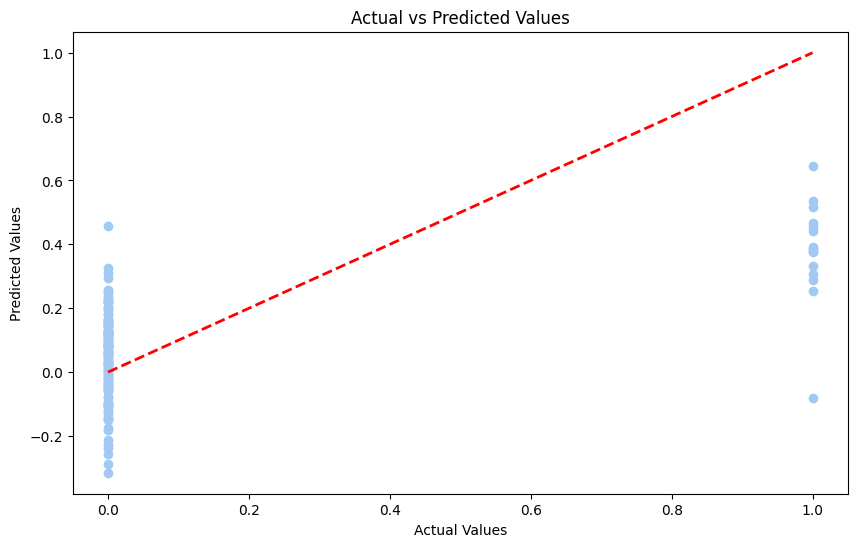

In [20]:
# Visualization of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

#red dashed line (r--) to indicate perfect prediction, where the actual and predicted values are equal

<span>This is an **Actual vs Predicted** plot.
- The **red dashed line** represents the ideal perfect fit (i.e., `y_actual = y_predicted`).
- Most predicted values are clustered around `0` and `1`, suggesting a **classification problem**.
- The model does not seem to predict intermediate values well.
- There is a high concentration of points along the vertical lines at `0` and `1`, indicating that predictions are not continuous.
- Possible **issues**: Poor model calibration or an over-simplified model.
</span>


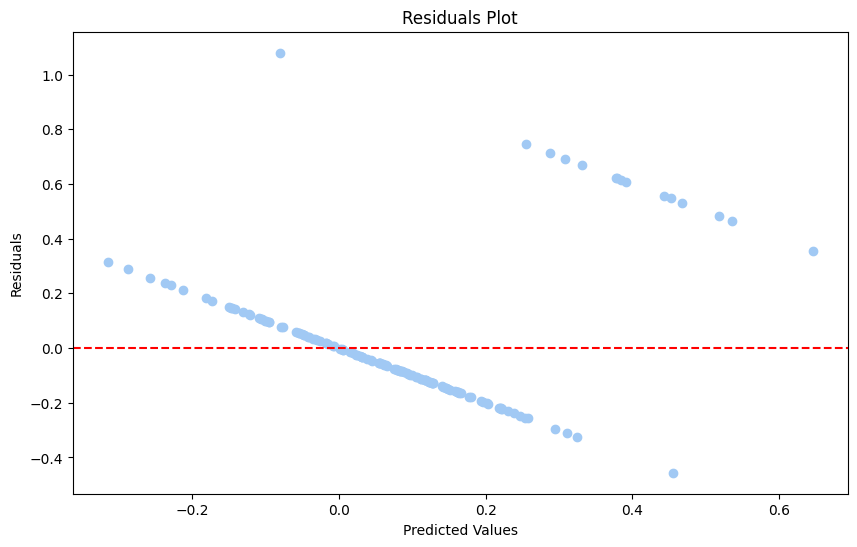

In [21]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

<span>Visualize the difference between the observed (actual) values and the predicted values. 
A well-fitting linear model should produce residuals that are randomly scattered around the horizontal line (y=0) without any clear patterns or structure.Here the resiidua;s are not scattered more likely to be non linear relationship.</span>
